In [21]:
#Getting going
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [22]:
#Defining what we are working with
Tipping = csv.reader(open('C:/Users/victo_000/Tipping/tips.csv', 'rt')) 
next(Tipping) 
data=[] 

In [23]:
#Matrix time
for row in Tipping:
    data.append(row)
data = np.array(data) 

In [24]:
#let's have a look at what we have
#whole
print (data)
#distribution pricing at a glance
data[0:15,0]

[['16.99' '1.01' 'Female' ..., 'Sun' 'Dinner' '2']
 ['10.34' '1.66' 'Male' ..., 'Sun' 'Dinner' '3']
 ['21.01' '3.5' 'Male' ..., 'Sun' 'Dinner' '3']
 ..., 
 ['22.67' '2' 'Male' ..., 'Sat' 'Dinner' '2']
 ['17.82' '1.75' 'Male' ..., 'Sat' 'Dinner' '2']
 ['18.78' '3' 'Female' ..., 'Thur' 'Dinner' '2']]


array(['16.99', '10.34', '21.01', '23.68', '24.59', '25.29', '8.77',
       '26.88', '15.04', '14.78', '10.27', '35.26', '15.42', '18.43',
       '14.83'], 
      dtype='<U6')

In [30]:
#panda time
df = pd.read_csv('tips.csv', header=0)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [34]:
#Panda, how many data are we dealing with ? Maybe I can just add this up manually?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [35]:
#Ok, let's start to look at some stats
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [99]:
#Ok, John voulais savoir si les femmes tips plus
#Voyons déjà qui sont les meilleurs tipeurs
df[df['tip'] > 6]

,total_bill,tip,sex,smoker,day,time,size,Gender
23,39.42,7.58,Male,No,Sat,Dinner,4,1
59,48.27,6.73,Male,No,Sat,Dinner,4,1
141,34.30,6.70,Male,No,Thur,Lunch,6,1
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1
212,48.33,9.00,Male,No,Sat,Dinner,4,1
214,28.17,6.50,Female,Yes,Sat,Dinner,3,0


In [98]:
#Ensuite
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [100]:
#Voyons si les hommes tips mieux
2.833448 < 3.089618

True

In [102]:
#Voyons l'effet des journées
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

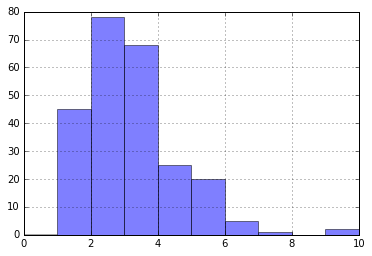

In [109]:
#Comment ca tip?
df['tip'].dropna().hist(bins=10, range=(0,10), alpha = .5)

In [113]:
#Allez, on regarde le pourcentage
df['pourcentage'] = df['tip']/df['total_bill']*100
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,Gender,pourcentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,1,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,1,16.658734


In [114]:
#Petite moyenne
df['pourcentage'].mean()

16.080258172250463

In [116]:
#Différence homme/femme
df.groupby('sex')['pourcentage'].mean()

sex
Female    16.649074
Male      15.765055
Name: pourcentage, dtype: float64

In [117]:
#Voyons si les hommes ont un meilleur pourcentage
16.649074 < 15.765055

False

In [118]:
#Classique textbook ==> Méfiez vous des apriori sur vos datas i.e. les femmes tips moins en valeur absolu mais donnent un meilleur %
#Ca sent le fake data pcq c'est un beau cas d'école mais bon je dit rien

(0, 40)

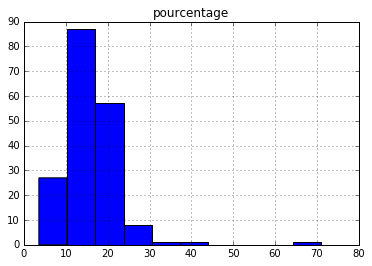

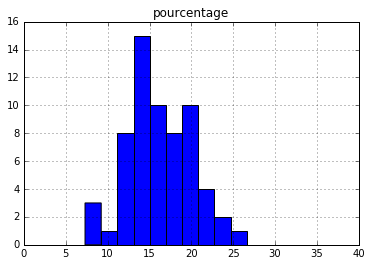

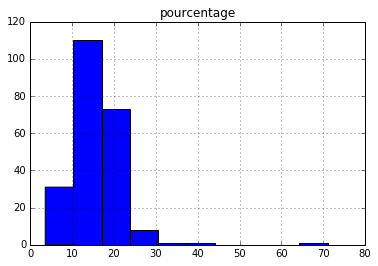

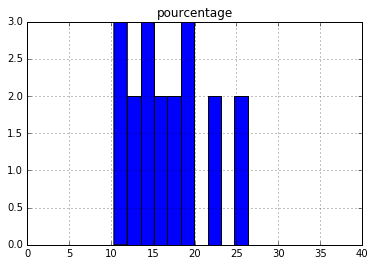

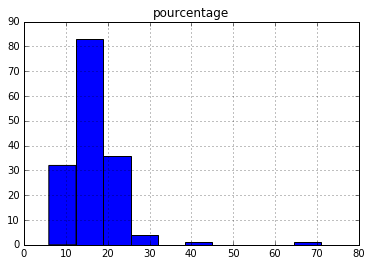

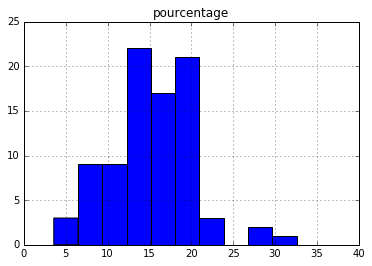

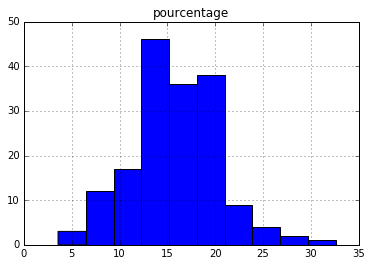

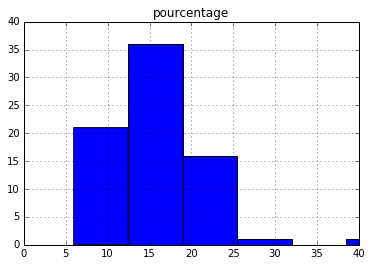

In [162]:
#Bon je crois que j'ai pas fini de répondre à la dernière question
df.groupby(df['day'] == 'Thur').hist('pourcentage')
plt.xlim(0, 40).bins=16
df.groupby(df['day'] == 'Fri').hist('pourcentage')
plt.xlim(0, 40)
df.groupby(df['day'] == 'Sat').hist('pourcentage')
plt.xlim(0, 40)
df.groupby(df['day'] == 'Sun').hist('pourcentage')
plt.xlim(0, 40)

NameError: name 'hist' is not defined

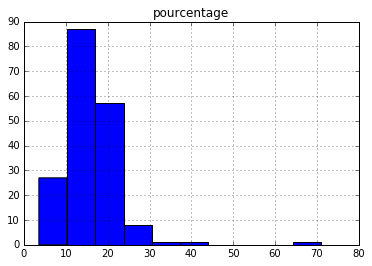

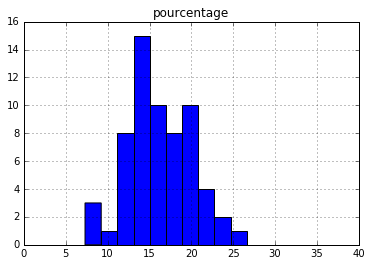

In [166]:
df.groupby(df['day'] == 'Thur').hist('pourcentage')
plt.xlim(0, 40)
plt.bins=100

In [167]:
#Voyons l'effet des journées sur pourcentage
df.groupby('day')['pourcentage'].mean()

day
Fri     16.991303
Sat     15.315172
Sun     16.689729
Thur    16.127563
Name: pourcentage, dtype: float64